1. [CloudTrail](#cloudtrail)
2. [CloudTrail Events](#cloudtrail-events)
3. [CloudTrail Events Retention](#cloudtrail-events-retention)
4. [Setup CloudTrail](#setup-cloudtrail)
5. [CloudTrail - API calls to send events to EventBridge](#cloudtrail---api-calls-to-send-events-to-eventbridge)
6. [CloudTrail vs CloudWatch vs X-Ray](#cloudtrail-vs-cloudwatch-vs-x-ray)

#### CloudTrail:
- Internal monitoring of API calls made
- Audit changes to AWS resources by users
- Provides governance, compliance, audit for AWS account
- It is enabled by default
- History of events/API calls made within AWs account
    - Console
    - SDK
    - CLI
    - Other AWS services
- Can put logs from CloudTrail into CloudWatch or S3
- A Trail can be applied to All regions or single region

Note:
- If a resource is deleted in AWS, investigate CloudTrail first
- If we want store information of CloudTrail for more than 90 days, its send to CloudWatch or S3

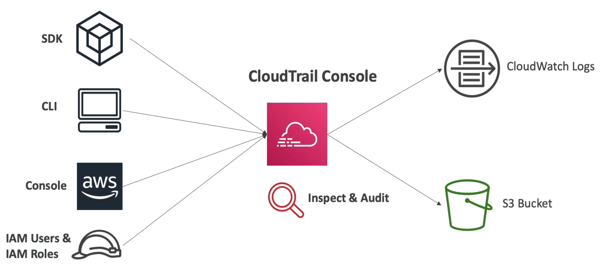

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudtrail.jpeg')
new_image = img.resize((600, 270))
display(new_image)

#### CloudTrail Events:

Management Events:
- Operations performed on resources in AWS account
- Eg:
    - Configure Security (IAM AttachRolePolicy)
    - Configure rules for routing data (Amazon EC2 CreateSubnet)
    - Setting up logging (AWS CloudTrail CreateTrail)
- By default, CloudTrail is configured to log Management events
- Can separate event: Read (not modify resources) & Write (modify resources)

Data Events:
- By default, data events are not logged (high volume of operations)
- Amazon S3 object level activity (GetObject, DeleteObject, PutObject)
- Can separate event: Read & Write
- AWS Lambda function execution activity (invoke API)

CloudTrail Insight Events:
- To detect unusual activity in AWS account
    - inaccurate resource provisioning
    - hitting service limits
    - burst of IAM actions
    - gaps in periodic maintenance activity
- Analyze normal management events to create baseline
- Continuously analyze write events to detect unusual patterns
- Anomalies detected will be available in CloudTrail console
    - can be sent to S3
    - EventBridge event can be generated (for automation)

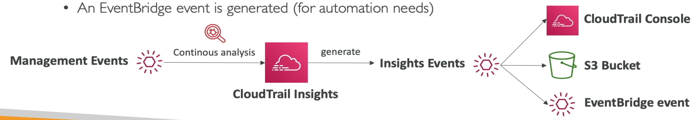

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudtrail1.jpeg')
new_image = img.resize((700, 120))
display(new_image)

#### CloudTrail Events Retention:
- 90 days events are stored in CloudTrail
- Above 90 days
    - send to CloudWatch or S3
    - use Athena for analysis

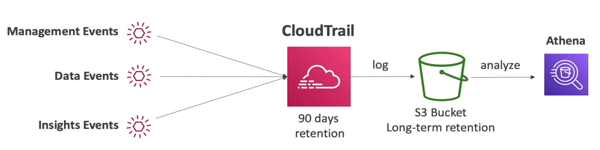

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudtrail2.jpeg')
new_image = img.resize((600, 150))
display(new_image)

#### Setup CloudTrail:
- Go CloudTrail console
    - Event History (last 90 days information)
        - Create Athena table
            - create the table with the below query template
    - Insights
    - Lake
        - Dashboard
        - Query
        - Event data stores
        - Integrations
    - Trails

In [13]:
# Athena Table Query

"""CREATE EXTERNAL TABLE [TABLE_NAME] (
    eventVersion STRING,
    userIdentity STRUCT<
        type: STRING,
        principalId: STRING,
        arn: STRING,
        accountId: STRING,
        invokedBy: STRING,
        accessKeyId: STRING,
        userName: STRING,
        sessionContext: STRUCT<
            attributes: STRUCT<
                mfaAuthenticated: STRING,
                creationDate: STRING>,
            sessionIssuer: STRUCT<
                type: STRING,
                principalId: STRING,
                arn: STRING,
                accountId: STRING,
                username: STRING>,
            ec2RoleDelivery: STRING,
            webIdFederationData: STRUCT<
               federatedProvider: STRING,
               attributes: MAP<STRING,STRING>>>>,
    eventTime STRING,
    eventSource STRING,
    eventName STRING,
    awsRegion STRING,
    sourceIpAddress STRING,
    userAgent STRING,
    errorCode STRING,
    errorMessage STRING,
    requestParameters STRING,
    responseElements STRING,
    additionalEventData STRING,
    requestId STRING,
    eventId STRING,
    resources ARRAY<STRUCT<
        arn: STRING,
        accountId: STRING,
        type: STRING>>,
    eventType STRING,
    apiVersion STRING,
    readOnly STRING,
    recipientAccountId STRING,
    serviceEventDetails STRING,
    sharedEventID STRING,
    vpcEndpointId STRING,
    tlsDetails STRUCT<
        tlsVersion: STRING,
        cipherSuite: STRING,
        clientProvidedHostHeader: STRING>
)
COMMENT 'CloudTrail table for [S3_BUCKET_NAME] bucket'
ROW FORMAT SERDE 'org.apache.hive.hcatalog.data.JsonSerDe'
STORED AS INPUTFORMAT 'com.amazon.emr.cloudtrail.CloudTrailInputFormat'
OUTPUTFORMAT 'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
LOCATION '[S3_BUCKET_URL]'
TBLPROPERTIES ('classification'='cloudtrail');
"""

"CREATE EXTERNAL TABLE [TABLE_NAME] (\n    eventVersion STRING,\n    userIdentity STRUCT<\n        type: STRING,\n        principalId: STRING,\n        arn: STRING,\n        accountId: STRING,\n        invokedBy: STRING,\n        accessKeyId: STRING,\n        userName: STRING,\n        sessionContext: STRUCT<\n            attributes: STRUCT<\n                mfaAuthenticated: STRING,\n                creationDate: STRING>,\n            sessionIssuer: STRUCT<\n                type: STRING,\n                principalId: STRING,\n                arn: STRING,\n                accountId: STRING,\n                username: STRING>,\n            ec2RoleDelivery: STRING,\n            webIdFederationData: STRUCT<\n               federatedProvider: STRING,\n               attributes: MAP<STRING,STRING>>>>,\n    eventTime STRING,\n    eventSource STRING,\n    eventName STRING,\n    awsRegion STRING,\n    sourceIpAddress STRING,\n    userAgent STRING,\n    errorCode STRING,\n    errorMessage STRIN

#### CloudTrail - API calls to send events to EventBridge:

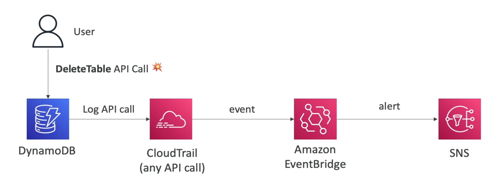

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudtrailapi.jpeg')
new_image = img.resize((500, 190))
display(new_image)

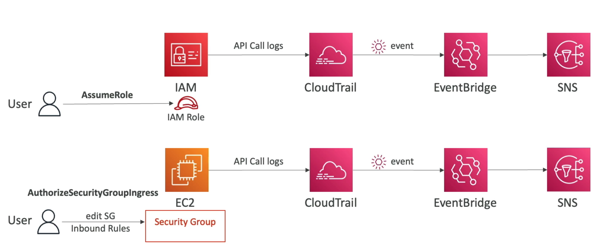

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudtrailapi1.jpeg')
new_image = img.resize((600, 250))
display(new_image)

#### CloudTrail vs CloudWatch vs X-Ray:

CloudTrail:
- Audit API calls of AWS resources
- Detect unusual activity

CloudWatch:
- Debugging and Troubleshooting application logs
- Store logs, monitor metrics, create events, set up alarms

X-Ray:
- Automated Trace Analysis
- Visual Analysis with Trace Map (service map)
- Latency, Error, Fault analysis
- Request tracking
- micro-services/distributed systems